#### COGS 108 Project

In [1]:
!pip install matplotlib==3.7.2
!pip install pandas==2.0.2
!pip install seaborn --yes


You should consider upgrading via the '/Users/sidharthsrinath/.pyenv/versions/3.9.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sidharthsrinath/.pyenv/versions/3.9.9/bin/python3.9 -m pip install --upgrade pip' command.

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --yes


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Fetching data

link to the dataset can be found [here](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download).

In [3]:
# loading in the datatset 
# csv assumed to be in the same directory as this notebook
df_original = pd.read_csv('diabetes_prediction_dataset.csv')
df_original.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# there are 100,000 records
df_original.shape

(100000, 9)

In [5]:
# checking for null values
df_original.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
# checking the type of each column
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# checking the distribution of numerical values
df_original.describe()[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [8]:
df = df_original.copy()
df['smoking_history'] = df['smoking_history'].str.lower()

df.groupby(['gender']).count()['age'] 

gender
Female    58552
Male      41430
Other        18
Name: age, dtype: int64

In [9]:
df = df[df['gender'] != 'Other']
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,no info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### EDA

<Axes: xlabel='diabetes', ylabel='proportion'>

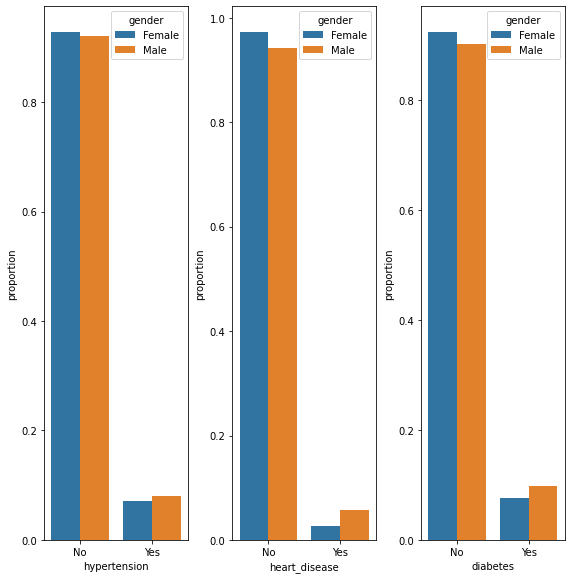

In [75]:
gen_hyp = (df.groupby(['gender'])[['hypertension']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .rename({0:'No',1:"Yes"})
                        .reset_index()
)
gen_hd = (df.groupby(['gender'])[['heart_disease']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .rename({0:'No',1:"Yes"})
                        .reset_index()
)
gen_d = (df.groupby(['gender'])[['diabetes']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .rename({0:'No',1:"Yes"})
                        .reset_index()
)
fig, axs = plt.subplots(ncols=3,figsize=(8,8))
fig.tight_layout()
sns.barplot(x='hypertension',y='proportion',hue='gender',data=gen_hyp,ax=axs[0])
sns.barplot(x='heart_disease',y='proportion',hue='gender',data=gen_hd,ax=axs[1])
sns.barplot(x='diabetes',y='proportion',hue='gender',data=gen_d,ax=axs[2])

<Axes: xlabel='blood_glucose_level', ylabel='proportion'>

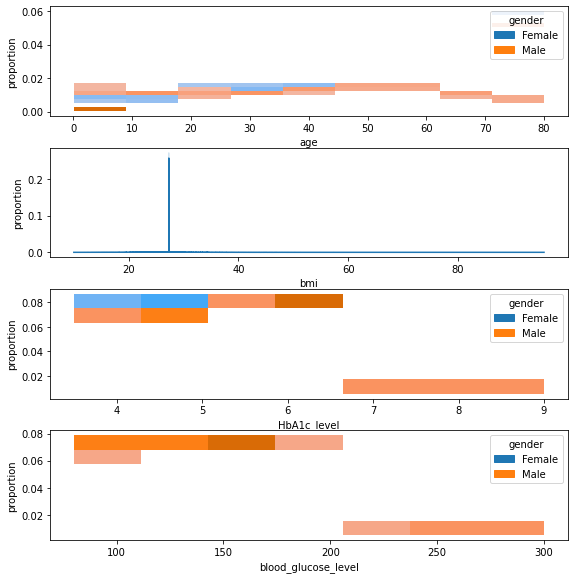

In [74]:
# average 'age', 'bmi', 'HbA1c_level', 'blood_glucose_level' by gender
gen_age = (df.groupby(['gender'])[['age']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .reset_index()
)

gen_bmi = (df.groupby(['gender'])[['bmi']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .reset_index()
)

gen_hba = (df.groupby(['gender'])[['HbA1c_level']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .reset_index()
)
gen_bgl= (df.groupby(['gender'])[['blood_glucose_level']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .reset_index()
)
fig, axs = plt.subplots(nrows=4,figsize=(8,8))
fig.tight_layout()
sns.histplot(x='age',y='proportion',hue='gender',data=gen_age, ax=axs[0])
sns.lineplot(x='bmi',y='proportion',data=gen_bmi,ax=axs[1])
sns.histplot(x='HbA1c_level',y='proportion',hue='gender',data=gen_hba,ax=axs[2])
sns.histplot(x='blood_glucose_level',y='proportion',hue='gender',data=gen_bgl,ax=axs[3])

<Axes: xlabel='labels', ylabel='heart_disease'>

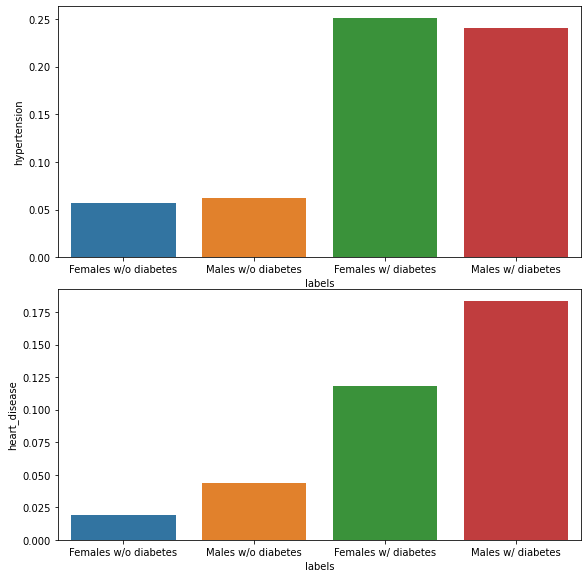

In [73]:
# proportion of 'hypertension', 'heart_disease' by diabetes status and gender
dg_hthd = df.groupby(['diabetes', 'gender'])[['hypertension', 'heart_disease']].mean().rename({'Female':1,'Male':0}).reset_index()
labels = ['Females w/o diabetes','Males w/o diabetes','Females w/ diabetes', 'Males w/ diabetes']
dg_hthd['labels'] = labels
fig, axs = plt.subplots(nrows=2,figsize=(8,8))
fig.tight_layout()
sns.barplot(x='labels',y='hypertension',data=dg_hthd, ax=axs[0])
sns.barplot(x='labels',y='heart_disease',data=dg_hthd, ax=axs[1])


<Axes: xlabel='labels', ylabel='blood_glucose_level'>

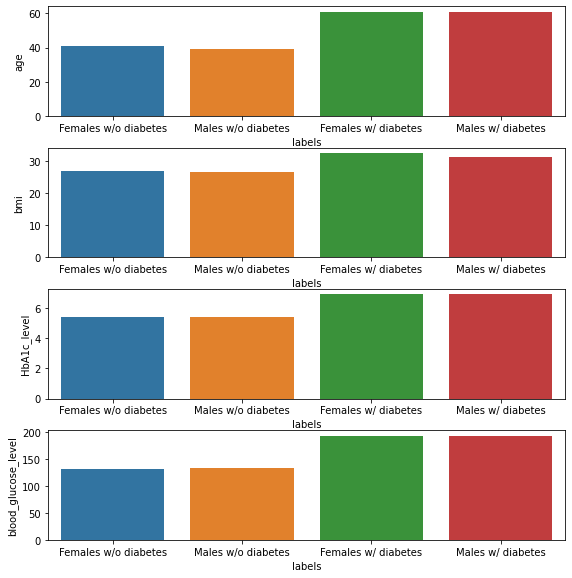

In [72]:
data2 = df.groupby(['diabetes', 'gender'])[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].mean().reset_index()
labels = ['Females w/o diabetes','Males w/o diabetes','Females w/ diabetes', 'Males w/ diabetes']
data2['labels'] = labels

fig, axs = plt.subplots(nrows=4,figsize=(8,8))
fig.tight_layout()
sns.barplot(x='labels',y='age',data=data2, ax=axs[0])
sns.barplot(x='labels',y='bmi',data=data2, ax=axs[1])
sns.barplot(x='labels',y='HbA1c_level',data=data2, ax=axs[2])
sns.barplot(x='labels',y='blood_glucose_level',data=data2, ax=axs[3])

In [49]:
# create age group bins to explore features by age group
# justify and/or change ages chosen here
bins = pd.cut(df['age'], [0, 5, 13, 18, 30, 45, 60, 80]) 
df['age_group'] = bins

<Axes: xlabel='age_group', ylabel='heart_disease'>

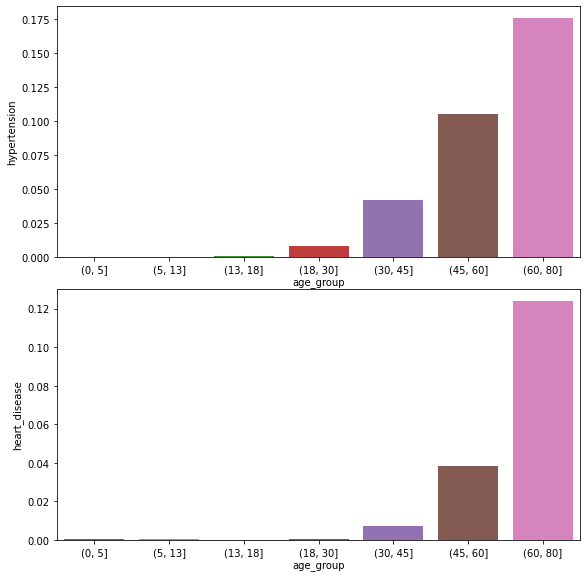

In [71]:
# proportion of 'hypertension', 'heart_disease', 'diabetes' by age group
data3 = df.groupby(['age_group'])[['hypertension', 'heart_disease']].mean().reset_index()

fig, axs = plt.subplots(nrows=2,figsize=(8,8))
fig.tight_layout()
sns.barplot(x='age_group',y='hypertension',data=data3,ax=axs[0])
sns.barplot(x='age_group',y='heart_disease',data=data3,ax=axs[1])

<Axes: xlabel='age_group', ylabel='blood_glucose_level'>

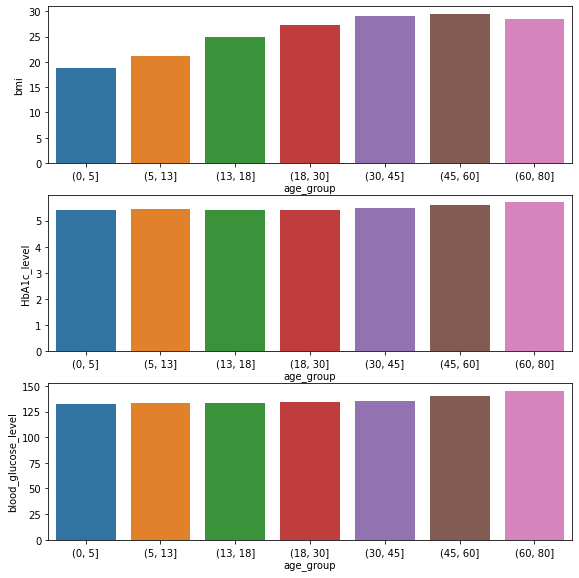

In [70]:
# average 'bmi', 'HbA1c_level', 'blood_glucose_level' by age group
data4 = df.groupby('age_group')[['bmi', 'HbA1c_level', 'blood_glucose_level']].mean().reset_index() # or median

fig, axs = plt.subplots(nrows=3,figsize=(8,8))
fig.tight_layout()
sns.barplot(x='age_group',y='bmi',data=data4, ax=axs[0])
sns.barplot(x='age_group',y='HbA1c_level',data=data4, ax=axs[1])
sns.barplot(x='age_group',y='blood_glucose_level',data=data4, ax=axs[2])


<Axes: xlabel='hypertension', ylabel='diabetes'>

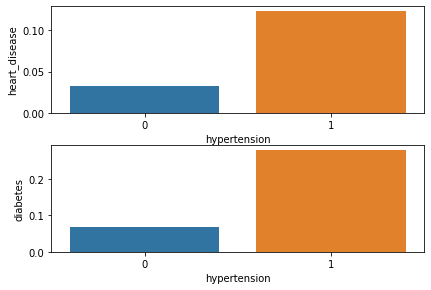

In [91]:
# proportion of 'heart_disease', 'diabetes' by hypertension status
data5 = df.groupby('hypertension')[['heart_disease', 'diabetes']].mean().reset_index().rename({0:'no hypertension',1:'hypertension'})

fig, axs = plt.subplots(nrows=2)
fig.tight_layout()
sns.barplot(x='hypertension',y='heart_disease',data=data5, ax=axs[0])
sns.barplot(x='hypertension',y='diabetes',data=data5, ax=axs[1])

<Axes: xlabel='heart_disease', ylabel='diabetes'>

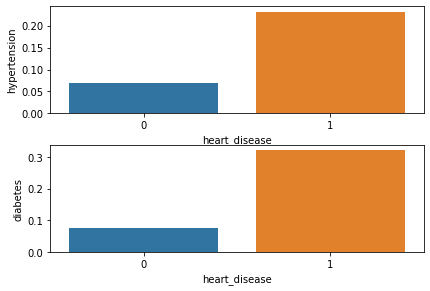

In [92]:
# proportion of 'hypertension', 'diabetes' by heart_disease status
data6 = df.groupby('heart_disease')[['hypertension', 'diabetes']].mean().reset_index()

fig, axs = plt.subplots(nrows=2)
fig.tight_layout()
sns.barplot(x='heart_disease',y='hypertension',data=data6, ax=axs[0])
sns.barplot(x='heart_disease',y='diabetes',data=data6, ax=axs[1])

To do: 

- Add bins for `bmi` and see proportions and averages, similarly explore `HbA1c_level` and/or `blood_glucose_level`, using either bins for the numerical values, or by assigning levels such as `high`, `normal`, `low`, etc (see below).


- Create plots to visualize EDA.


- We are building a classifier to predict `diabetes` status of a patient, we can focus on those 18, and maybe even 13 and above, because for ages below that there are very few records as a proportion of the dataset. 


- If anyone would like to create a classifier or a regressor that predicts another feature in, or maybe even currently external to the datatset (such as `bmi_level` and not just `bmi`), I am open to suggestions. I chose `diabetes` status since it is the most obvious, but also for this dataset, the most reasonable variable to try to predict.

#### Data Cleaning and Feature Engineering

additional data for feature engineering:
- bmi level: [cdc](https://www.cdc.gov/obesity/basics/adult-defining.html)
- hba1c level: [bmc](https://bmcendocrdisord.biomedcentral.com/articles/10.1186/s12902-019-0338-7)
- blood glucose level: [medlineplus](https://medlineplus.gov/ency/patientinstructions/000086.htm#:~:text=From%2090%20to%20130%20mg,children%20under%206%20years%20old)
- diabetes likelihood: [cdc](https://www.cdc.gov/media/releases/2017/p0718-diabetes-report.html)

can add more related / relevant links